# Game Theory Project - Omer Shriky

In this project I will present 3 strategies in Roulette,<br>
We will compare which one is best via Expected value, Standerd Diviation and Statistical testing.

The strategies are:<br>
Safe player (pure strategy) - bets 50\\$ on a color (probability $P(	ext{win}) = rac{18}{37}$)<br>
Greedy player (pure strategy) - bets 10\\$ on a single number (probability 1/37)<br>
Mixed strategy player (Mixed strategy) - distributes his choises between 3 picks and places<br>
    &emsp; 1) 50% chance of betting 50\\$ on a color<br>
    &emsp; 2) 30% chance of betting 30\\$ on a dozen (probability 12/37)<br>
    &emsp; 3) 20% chance of betting 10\\$ on a single number

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# We determine the number of days, budget and rounds per day the players play 
days = 1000
games = 500
start_budget = 1000

In [3]:
# We create a 1000 x 1001 matrix for each player
history_safe = np.zeros((days, games + 1))
history_greedy = np.zeros((days, games + 1))
history_mixed = np.zeros((days, games + 1))

In [4]:
# we set the first column which represents the starting point for each player
history_safe[:, 0] = start_budget
history_greedy[:, 0] = start_budget
history_mixed[:, 0] = start_budget

In [5]:
for game in range(1,games+1):
    # safe player plays
    is_win = np.random.rand(days) < 18/37
    earnings = np.where(is_win,50,-50)
    history_safe[:, game] = history_safe[:, game-1] + earnings
    
    # greedy player plays
    is_win = np.random.rand(days) < 1/37
    earnings = np.where(is_win,350,-10)
    history_greedy[:, game] = history_greedy[:, game-1] + earnings
    
    # mixed strategy player plays
    
    start_roll = np.random.rand(days)
    earnings_mixed = np.zeros(days)
    chose_safe = start_roll<0.5
    chose_dozen = (start_roll>=0.5) & (start_roll<0.8)
    chose_greedy = start_roll>=0.8

    if np.any(chose_safe):
        wins = np.random.rand(np.sum(chose_safe)) < (18/37)
        earnings_mixed[chose_safe] = np.where(wins, 50, -50)

    if np.any(chose_dozen):
        wins = np.random.rand(np.sum(chose_dozen)) < (12/37)
        earnings_mixed[chose_dozen] = np.where(wins, 60, -30)

    if np.any(chose_greedy):
        wins = np.random.rand(np.sum(chose_greedy)) < (1/37)
        earnings_mixed[chose_greedy] = np.where(wins, 350, -10)
    history_mixed[:, game] = history_mixed[:, game-1] + earnings_mixed
    
# calculate average for every player throughout the day
    
avg_safe = np.mean(history_safe,axis=0)
avg_greedy = np.mean(history_greedy,axis=0)
avg_mixed = np.mean(history_mixed,axis=0)



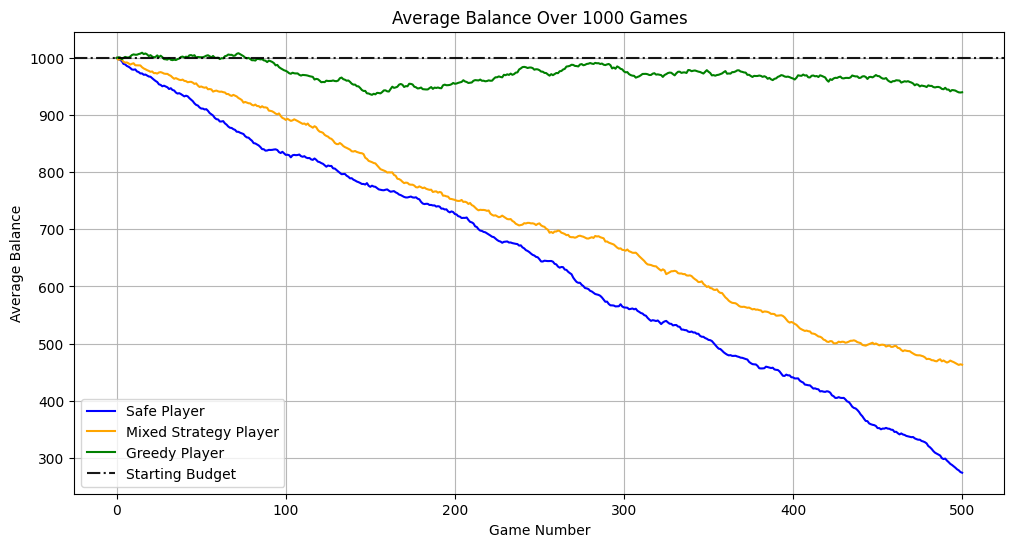

In [6]:
plt.figure(figsize=(12, 6))

plt.plot(avg_safe, label='Safe Player', color='blue', linewidth=1.5)
plt.plot(avg_mixed, label='Mixed Strategy Player', color='orange', linewidth=1.5)
plt.plot(avg_greedy, label='Greedy Player', color='green', linewidth=1.5)

plt.title('Average Balance Over 1000 Games')
plt.xlabel('Game Number')
plt.ylabel('Average Balance')
plt.axhline(y=1000, color='black', linestyle='-.', alpha=0.9, label='Starting Budget')
plt.legend()
plt.grid(True, alpha=0.9)

plt.show()

### Mathematical Breakdown

In [7]:
std_safe = np.std(history_safe, axis=0)
std_greedy = np.std(history_greedy, axis=0)
std_mixed = np.std(history_mixed, axis=0)

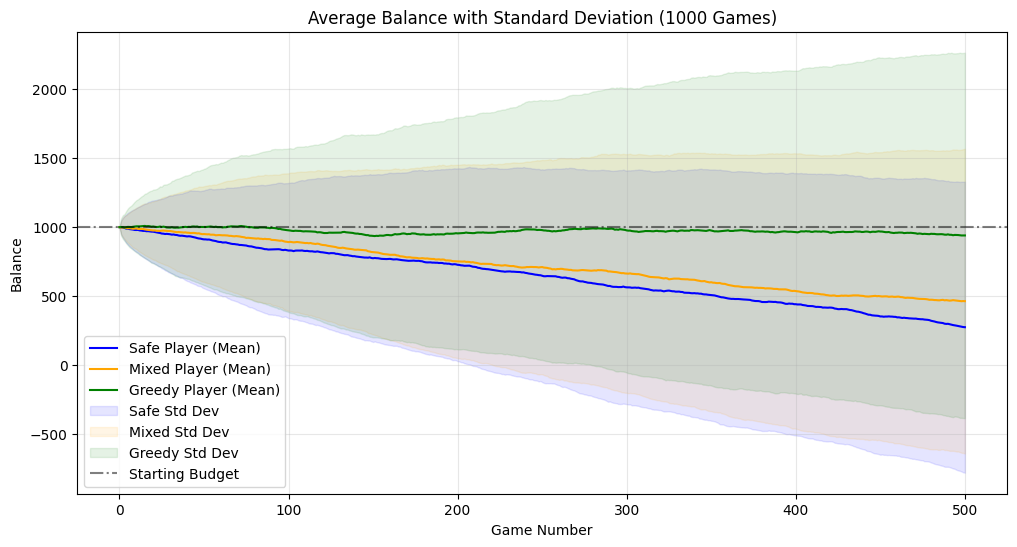

In [8]:
plt.figure(figsize=(12, 6))

plt.plot(avg_safe, label='Safe Player (Mean)', color='blue', linewidth=1.5)
plt.plot(avg_mixed, label='Mixed Player (Mean)', color='orange', linewidth=1.5)
plt.plot(avg_greedy, label='Greedy Player (Mean)', color='green', linewidth=1.5)

x_axis = range(games + 1)

plt.fill_between(x_axis, avg_safe - std_safe, avg_safe + std_safe, color='blue', alpha=0.1, label='Safe Std Dev')
plt.fill_between(x_axis, avg_mixed - std_mixed, avg_mixed + std_mixed, color='orange', alpha=0.1, label='Mixed Std Dev')
plt.fill_between(x_axis, avg_greedy - std_greedy, avg_greedy + std_greedy, color='green', alpha=0.1, label='Greedy Std Dev')

plt.title('Average Balance with Standard Deviation (1000 Games)')
plt.xlabel('Game Number')
plt.ylabel('Balance')
plt.axhline(y=1000, color='black', linestyle='-.', alpha=0.5, label='Starting Budget')

plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)

plt.show()

### Statistical Testing

We will perform a t-test to determine if our results are statistically significant at the 0.05 level.

In [10]:
p_value1 = stats.ttest_ind(history_greedy[:,-1], history_safe[:,-1], alternative='greater', equal_var=False)[-1]
p_value2 = stats.ttest_ind(history_greedy[:,-1], history_mixed[:,-1], alternative='greater', equal_var=False)[-1]

In [11]:
if p_value1<0.05:
    print("\nThe Greedy player strategy is better than the cautious player strategy")
else:
    print("\nThe Cautious player strategy is better then the greedy player strategy")

print("\n--------------------------------------------------------------------------------------\n")
if p_value2<0.05:
    print("The Greedy player strategy is better than the mixed strategy")
else:
    print("The mixed strategy is better then the greedy pure strategy")


The Greedy player strategy is better than the cautious player strategy

--------------------------------------------------------------------------------------

The Greedy player strategy is better than the mixed strategy


In summary, 
It doesn't matter what is the winning probability of a players choise when playing roulette, 
what does matter is the amount a player chooses to gamble and according to the simulation the best strategy is to gamble as little as possible,
hence the Nash equalibrium for this game (since the player is the only one who can make rational choises) is to not play at all, 
because the player is guarenteed to lose the game in the long run

Conclusion: THE HOUSE ALWAYS WINS